In [1]:
# Libraries

install.packages('rcompanion')
install.packages('car')
install.packages('readxl')

library(tidyverse)
library(IDPmisc)
library(rcompanion)
library(car)
library(readxl)


The downloaded binary packages are in
	/var/folders/t5/4lqy4g_n1z14zq1k52ld2cx00000gn/T//RtmpaYPzuZ/downloaded_packages

The downloaded binary packages are in
	/var/folders/t5/4lqy4g_n1z14zq1k52ld2cx00000gn/T//RtmpaYPzuZ/downloaded_packages

The downloaded binary packages are in
	/var/folders/t5/4lqy4g_n1z14zq1k52ld2cx00000gn/T//RtmpaYPzuZ/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [4]:
yt = read.csv('/Users/britfathi/Downloads/YouTubeChannels.csv')

In [5]:
head(yt)

,Rank,Grade,Channel.name,Video.Uploads,Subscribers,Video.views
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1st,A++,Zee TV,82757,18752951,20869786591
2,2nd,A++,T-Series,12661,61196302,47548839843
3,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
4,4th,A++,SET India,27323,31180559,22675948293
5,5th,A++,WWE,36756,32852346,26273668433
6,6th,A++,Movieclips,30243,17149705,16618094724


In [6]:
str(yt)
## Video.views is continuous and grade is categorical

'data.frame':	5000 obs. of  6 variables:
 $ Rank         : chr  "1st" "2nd" "3rd" "4th" ...
 $ Grade        : chr  "A++ " "A++ " "A++ " "A++ " ...
 $ Channel.name : chr  "Zee TV" "T-Series" "Cocomelon - Nursery Rhymes" "SET India" ...
 $ Video.Uploads: chr  "82757" "12661" "373" "27323" ...
 $ Subscribers  : chr  "18752951" "61196302" "19238251" "31180559" ...
 $ Video.views  : num  2.09e+10 4.75e+10 9.79e+09 2.27e+10 2.63e+10 ...


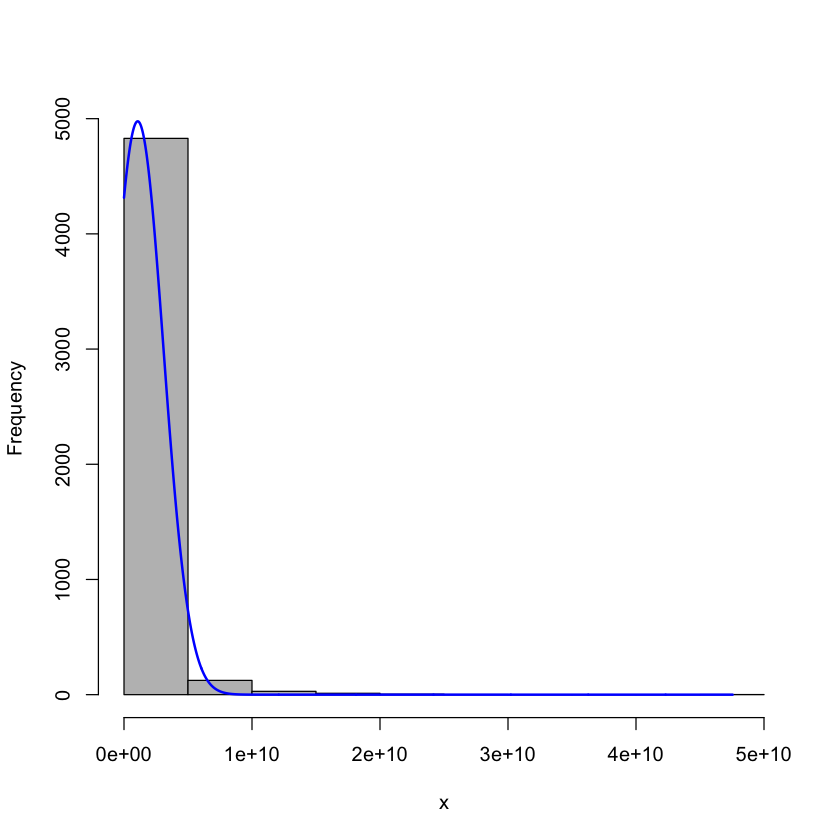

In [7]:
plotNormalHistogram(yt$Video.views)
## Skewed right. 

In [8]:
yt$Video.viewsSQRT <- sqrt(yt$Video.views)

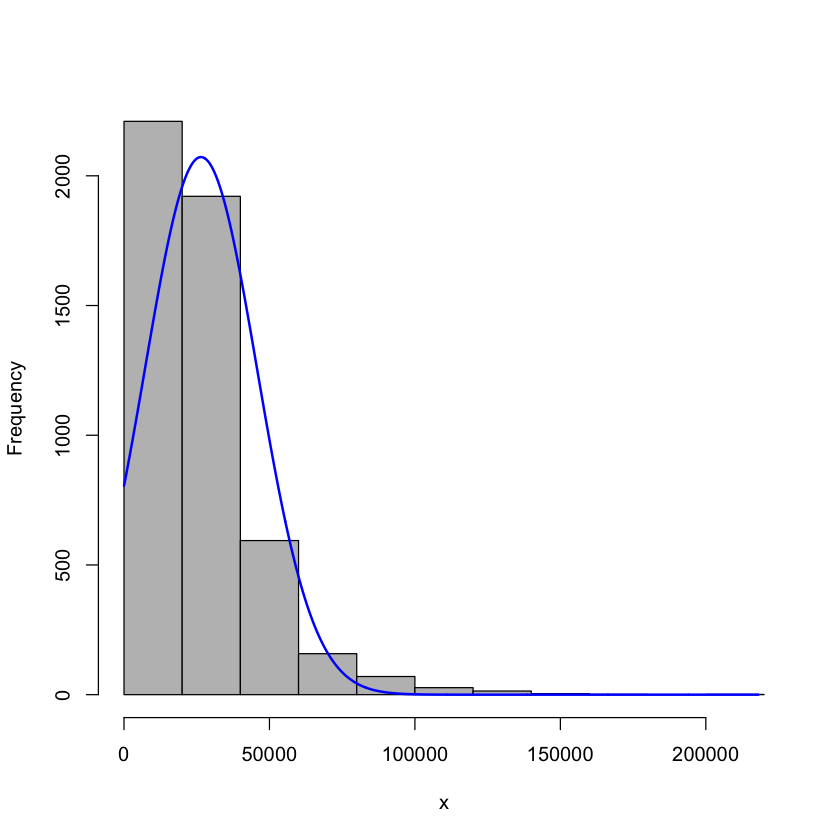

In [9]:
plotNormalHistogram(yt$Video.viewsSQRT)
# Still not normal

In [17]:
bartlett.test(Video.viewsSQRT ~ Grade, data = yt)


	Bartlett test of homogeneity of variances

data:  Video.viewsSQRT by Grade
Bartlett's K-squared = 1107.1, df = 5, p-value < 2.2e-16


In [19]:
fligner.test(Video.viewsSQRT ~ Grade, data = yt)


	Fligner-Killeen test of homogeneity of variances

data:  Video.viewsSQRT by Grade
Fligner-Killeen:med chi-squared = 628.45, df = 5, p-value < 2.2e-16


In [20]:
## Not sure if this looks right. Both are significant. Does not meet assumption of homogeneity. 
## Trying the log just in case. 

In [13]:
yt$Video.viewsLOG <- log(yt$Video.views)

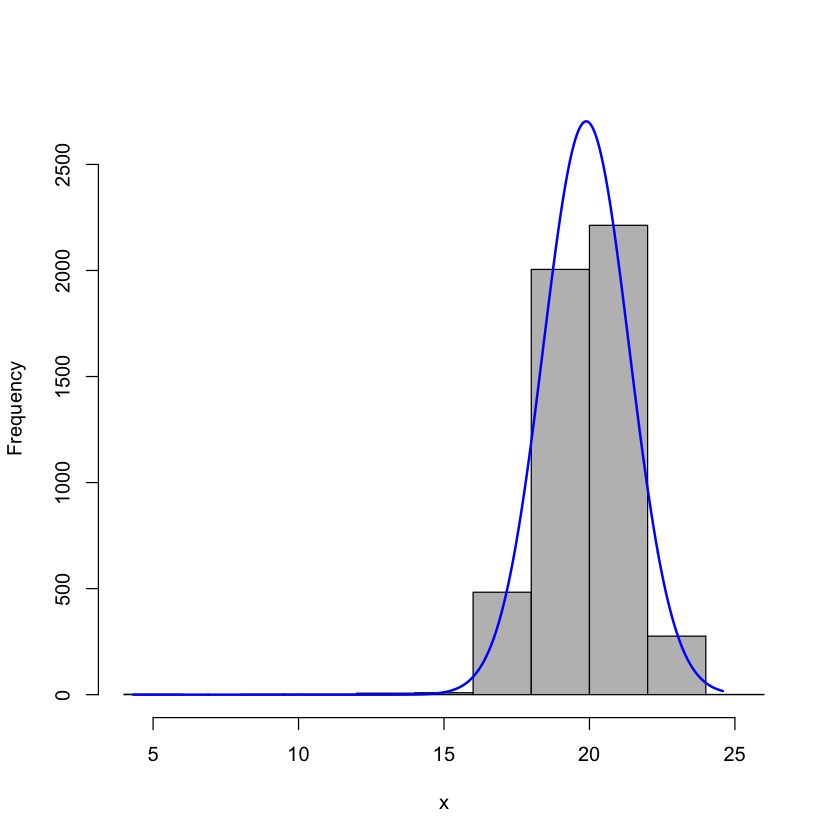

In [11]:
plotNormalHistogram(yt$Video.viewsLOG)
# Now it looks left skewed, but not as bad?? ... 

In [15]:
bartlett.test(Video.viewsLOG ~ Grade, data = yt)


	Bartlett test of homogeneity of variances

data:  Video.viewsLOG by Grade
Bartlett's K-squared = 30.187, df = 5, p-value = 1.355e-05


In [16]:
fligner.test(Video.viewsLOG ~ Grade, data = yt)


	Fligner-Killeen test of homogeneity of variances

data:  Video.viewsLOG by Grade
Fligner-Killeen:med chi-squared = 6.1236, df = 5, p-value = 0.2944


In [21]:
## With the log transformation, Fligner's test shows it's non-significant. It does meet homogeneity with Fligner's. 

In [22]:
## Doing the test with unequal variance first using sqrt... then with equal variance with the log... 

In [24]:
ANOVA1 <- lm(Video.viewsSQRT ~ Grade, data = yt)
Anova(ANOVA1, Type = "II", white.adjust=TRUE)

Coefficient covariances computed by hccm()

Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”


,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
Grade,5,215.9149,4.112783e-209
Residuals,4994,NA,NA


In [26]:
ytANOVA <- aov(yt$Video.viewsLOG ~ yt$Grade)
summary(ytANOVA)

              Df Sum Sq Mean Sq F value Pr(>F)    
yt$Grade       5   1948   389.6   217.6 <2e-16 ***
Residuals   4994   8940     1.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [27]:
## Between the two, the SQRT had a more significant result, but both were significant. 


In [29]:
## Do Post Hocs with unequal variance
pairwise.t.test(yt$Video.viewsSQRT, yt$Grade, p.adjust="bonferroni", pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  yt$Video.viewsSQRT and yt$Grade 

             A       A-      A+      A++    
A    1.7e-05 -       -       -       -      
A-   0.00146 < 2e-16 -       -       -      
A+   8.9e-14 1.9e-05 2.2e-09 -       -      
A++  6.8e-05 0.00084 0.00029 0.00874 -      
B+   0.03203 < 2e-16 < 2e-16 2.1e-11 0.00017

P value adjustment method: bonferroni 

In [30]:
## All were significant. Now look at the means. 

In [32]:
ytMeans <- yt %>% group_by(Grade) %>% summarize(Mean = mean(Video.views))
ytMeans

Grade,Mean
<chr>,<dbl>
,99120051
A,2361317332
A-,1041149249
A+,6053120621
A++,21199091193
B+,526521651


In [ ]:
## The higher the grade, the more the views. All Grades differ signifiantly from the number of views they have. 